# 0. Introduction


Make sure that you are in the `astrohack` environment using Anaconda Python. If this is not the case -- or you have no idea what I mean by that -- follow the instructions at [this page](https://github.com/rutgers-physics-ml/astro-hack-2018-spring). Afterwards, you can deploy a Jupyter notebook by running in the `astrohack` environment:

    jupyter notebook
    
and then navigating the directory tree:

```
astro-hack-2018-spring
├── data
├── doc
├── notebook
│   ├── session-1
│   ├── session-2
│   ├── session-3
│   └── session-4
├── results
└── src
```

to `./notebooks/session-1` and then opening the first notebook. 

If everything looks good, then let's get started right away with examples. 

## Running code

There are different kinds of cells in Jupyter notebooks. This text is in a cell (using the `Markdown` typesetting language). Some cells have `In [1]:` next to them; those are `Code` cells. You can change the code in them by selecting them and then typing whatever you want. Press `<Shift-Enter>` to run the code in the cell.


## Variables

In Python, variables are declared without explicit types.

In [1]:
x = 3
y = 4.5

print('x = {:d} and is has type {:s}.'.format(x, type(x).__name__))
print('y = {:.1f} and is has type {:s}.'.format(y, type(y).__name__))

x = 3 and is has type int.
y = 4.5 and is has type float.


## Integers and simple operators

In Python 3, integers divide as floating point numbers. In Python 2, integer division (`//`) is the default.

In [2]:
5 / 3

1.6666666666666667

In [3]:
5 // 3

1

In [4]:
5 % 3

2

In [5]:
4**2

16

In [6]:
4**3

64

In [7]:
7 - (5 - 2)

4

## Lists, iterables, and loops

Iterables are always 0-indexed.

In [8]:
my_favorite_list = [3, -0.5, 'pineapples']

print(my_favorite_list[0])
print(my_favorite_list[1])
print(my_favorite_list[2])

3
-0.5
pineapples


In [9]:
for i in range(0, 3):
    print(my_favorite_list[i])

3
-0.5
pineapples


In [10]:
for item in my_favorite_list:
    print(item)

3
-0.5
pineapples


In [11]:
my_other_list = ['three', 'negative zero-point-five', '🍍']

for fave, other in zip(my_favorite_list, my_other_list):
    print(fave, other)

3 three
-0.5 negative zero-point-five
pineapples 🍍


Lists are mutable; i.e., they and their elements can be changed.

In [12]:
my_other_list[2] = '🍍🍍🍍'
print(my_other_list)

['three', 'negative zero-point-five', '🍍🍍🍍']


In [13]:
we_need_to_go_deeper = [['turtles', [3, 1, 4, 1, 5]],
                        my_favorite_list,
                        my_other_list
                       ]

for n, list_ in enumerate(we_need_to_go_deeper):
    print('List #{} is: {}, with {} elements.'.format(n, list_, len(list_)))

List #0 is: ['turtles', [3, 1, 4, 1, 5]], with 2 elements.
List #1 is: [3, -0.5, 'pineapples'], with 3 elements.
List #2 is: ['three', 'negative zero-point-five', '🍍🍍🍍'], with 3 elements.


`Lists` are one type of iterable, but so are `tuples`. `Tuples` are *immutable*.

In [14]:
tup = (3, 5, 9.5)
print(tup[1])

5


In [15]:
# this will not work
# tup[1] = -4

In [16]:
# but they can be overwritten (re-assigned)
tup = (3, -4, 9.5)
print(tup)

(3, -4, 9.5)


### Unpacking
Any iterable can be unpacked as such:

In [17]:
x, y, z = tup
print(z)

9.5


Technically, even a string is just an iterable character array.

In [18]:
s = 'hello'
c1, c2, c3, c4, c5 = s
print(c1, c3)

h l


## Numpy

Numerical Python, or numpy for short, is a Python package used for implementing arrays and numerical methods.

In [19]:
# using a package
import numpy

# or import package under an alias (shorthand)
import numpy as np

If you want to read the documentation, try this:

In [20]:
np.array?

An array must contain objects of the same type (such as floats)

In [21]:
a = np.array([[0.5, -3., 1.],
              [1.2, 4.5, -8]])

print(a)

[[ 0.5 -3.   1. ]
 [ 1.2  4.5 -8. ]]


In [22]:
print(a.shape)

(2, 3)


Numpy arrays are **row-major**, meaning that indices traverse along rows first. This is also the case for `C`. In linear algebra, `Matlab`, `Fortran`, etc., matrices are **column-major**.

In [23]:
a[0]

array([ 0.5, -3. ,  1. ])

In [24]:
a[0, 1]

-3.0

In [25]:
a.transpose()

array([[ 0.5,  1.2],
       [-3. ,  4.5],
       [ 1. , -8. ]])

In [26]:
v = np.arange(1, 6, 1)
w = np.linspace(1, 6, 6)
print(v)
print(w)
print(w.astype(int))

[1 2 3 4 5]
[1. 2. 3. 4. 5. 6.]
[1 2 3 4 5 6]


In [27]:
# this is the (rather unintuitive) way to turn a row vector into a column vector
v[:, np.newaxis]

array([[1],
       [2],
       [3],
       [4],
       [5]])

Unlike in `Matlab`, simple operations take effect element-wise.

In [28]:
a**2

array([[ 0.25,  9.  ,  1.  ],
       [ 1.44, 20.25, 64.  ]])

In [29]:
a * a

array([[ 0.25,  9.  ,  1.  ],
       [ 1.44, 20.25, 64.  ]])

In [30]:
# matrix multiplication
c = np.matmul(a.transpose(), a)
c

array([[  1.69,   3.9 ,  -9.1 ],
       [  3.9 ,  29.25, -39.  ],
       [ -9.1 , -39.  ,  65.  ]])

Note that certain invalid operations will result in `nan`, or *not a number*. They (sort of) function like any other number...

In [31]:
d = np.sqrt(c)
d

/home/john/anaconda2/envs/astrohack/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([[1.3       , 1.97484177,        nan],
       [1.97484177, 5.40832691,        nan],
       [       nan,        nan, 8.06225775]])

In [32]:
d -= 1
d

array([[0.3       , 0.97484177,        nan],
       [0.97484177, 4.40832691,        nan],
       [       nan,        nan, 7.06225775]])

In [33]:
d[2]

array([       nan,        nan, 7.06225775])

In [34]:
np.isfinite(d)

array([[ True,  True, False],
       [ True,  True, False],
       [False, False,  True]])

In [35]:
d[np.isnan(d)] = -1
d

array([[ 0.3       ,  0.97484177, -1.        ],
       [ 0.97484177,  4.40832691, -1.        ],
       [-1.        , -1.        ,  7.06225775]])

In [36]:
z = [0.5, -2, np.nan, 0]
np.mean(z)

nan

In [37]:
np.nanmean(z)

-0.5

In [38]:
np.nanmedian(z)

0.0

In [39]:
np.nanstd(z)

1.0801234497346435

## Comparative operators and boolean logic

Certain operators can be compared across different types so long as they are compatible. In Python, `True` and `False` are equivalent to `1` and `0` respectively.

In [40]:
a = 10
b = 13.5

In [41]:
a == b

False

In [42]:
a <= b

True

In [43]:
1 == True

True

In [44]:
1 or False

1

In [45]:
bool(1 or False)

True

In [46]:
sum([True, True, False, True, False])

3

## Making figures

In [47]:
import matplotlib.pyplot as plt

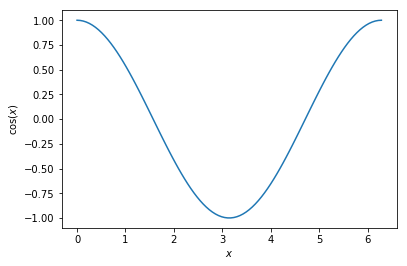

In [48]:
x = np.linspace(0, 2*np.pi, 100)
y = np.cos(x)

plt.plot(x, y)

plt.ylabel('cos($x$)')
plt.xlabel('$x$')

# this last part often isn't necessary in a Jupyter notebook
plt.show();

We can use the `%matplotlib notebook` command to vary how the figures appear in our notebook. For example, we can zoom in or pan around the figure. If we just want a static image, we can use `%matplotlib inline`.

In [49]:
%matplotlib inline

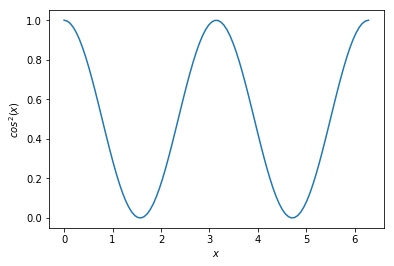

In [50]:
plt.plot(x, y**2)
plt.ylabel(r'$cos^2(x)$')
plt.xlabel('$x$'); # note that the semicolon suppresses text from appearing in the Jupyter cell

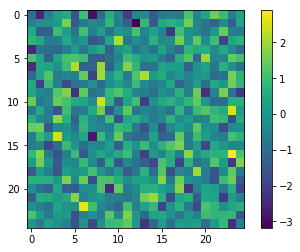

In [51]:
noise = np.random.randn(25, 25)

plt.imshow(noise)
plt.colorbar();

Let's make some asthetic adjustments.

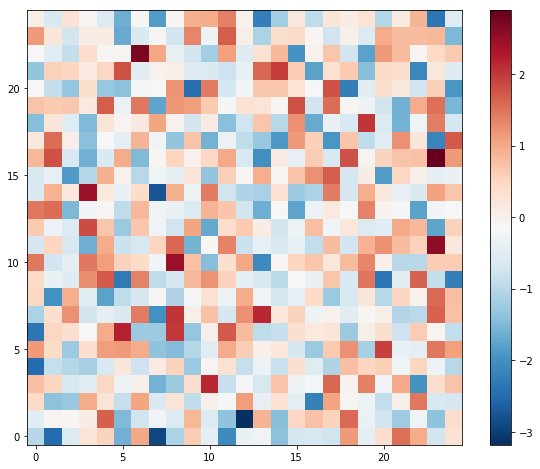

In [52]:
plt.figure(figsize=(10, 8))
plt.imshow(noise, origin='lower', cmap='RdBu_r')
plt.colorbar();

## Methods

In [53]:
def hello_world():
    print('Hello world!')

hello_world()

Hello world!


In [54]:
def say_hello(name):
    """Prints `Hello, <name>!`"""
    print('Hello {}!'.format(name))
    
say_hello('Nebuchadnezzar')

Hello Nebuchadnezzar!


In [55]:
# note: we can not overload a method this way
def say_hello(first_name, last_name):
    """Prints `Hello, <first> <last>!"""
    print('Hello {} {}!'.format(first_name, last_name))

my_name = ('John', 'Wu')

# the asterisk means that the tuple should be unpacked into two separate and unnamed variables
say_hello(*my_name)

Hello John Wu!


Similarly, we can write methods that return objects (or `float` or `int`, etc.)

In [56]:
def median_absolute_deviation(vec):
    """Returns the median absolute deviation (MAD) of a series of numbers.
    MAD := median(|vec - median(vec)|), where `|` denotes absolute values.
    """
    
    MAD = np.nanmedian(np.abs(vec - np.nanmedian(vec)))
    
    return MAD

In [57]:
vec = (np.pi, np.e, -1, 0.5, np.cos(8.), 0., np.nan, 1234567890)

print('Median absolute deviations: {}'.format(median_absolute_deviation(vec)))
print('Standard deviations: {}'.format(np.nanstd(vec)))

Median absolute deviations: 1.5
Standard deviations: 432008768.7422445


# Manipulating numpy arrays

In [58]:
a = np.random.randn(3, 40)

# If a has shape (3, 40), then taking a mean along the axis 0 will result in a length-40 array
np.mean(a, axis=0)

# taking the mean along the axis 1 would result in a length-3 array

array([ 0.35326723,  0.29284434,  0.68816462,  0.83262778, -0.02652893,
        0.52332427,  0.45669523,  0.43653058,  0.37754403, -0.66068887,
        0.31559313, -1.51166835, -0.17541024,  0.31713893,  0.03670422,
        0.34151233, -0.58149669, -0.0664502 ,  1.01795866,  0.3101665 ,
       -0.72282337,  0.69266537,  1.06493033,  0.03218383,  1.00210877,
        0.90315092,  0.41579025, -0.83178215,  0.03087592, -0.04926525,
       -0.41710417, -0.14479561, -0.18899246, -0.70689552,  0.97491561,
       -0.5738088 , -0.07536692, -1.03672931,  0.63468831, -0.19652499])

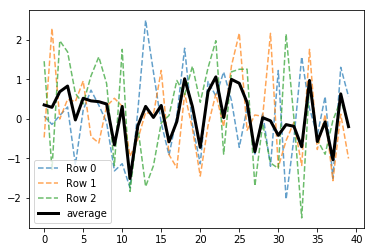

In [59]:
# visualizing the above
for j, row in enumerate(a):
    plt.plot(row, ls='--', alpha=0.7, label='Row {}'.format(j))

plt.plot(np.mean(a, axis=0), c='black', lw=3, label='average')
plt.legend();

## Exercise 1
Let's suppose that you receive a two dimensional array. You can assume that this array may have negative numbers and even `nan` values in it. Write a function that lets you find the indices of where the maximum pixel is located. So, if the array is of size (64, 64), and the peak pixel is at i=31, j=27, then it should return a tuple (31, 27).

In [60]:
def find_peak_pixel_indices(array):
    """Finds the indices of the maximum pixel in a given array.
    """
    
    # fill out code below and replace i, j with correct answer
    # --------------------------------------------------------
    
    i, j = 0, 0
    
    # hint: look at the documentation for the functions:
    #  np.nanargmax
    #  np.unravel_index
       
    return i, j


😢


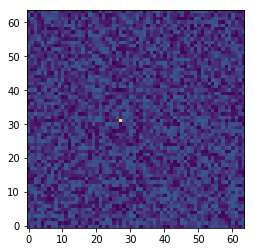

In [61]:
# don't change this
i0, j0 = 31, 27

# uniformly distributed noise in interval [0, 0.3)
mat = 0.3 * np.random.random((64, 64))

# plus obvious peak at location i0, j0
mat[i0, j0] = 1

plt.imshow(mat, origin='lower');

# testing your code
if (i0, j0) == find_peak_pixel_indices(mat):
    print('😄')
else:
    print('😢')

## Exercise 2
Now write a function that returns an un-normalized gaussian (or normal distribution) with given parameters: mean, $\mu$, around which the distribution is symmetric, and some variance $\sigma^2$ equal to the square of the standard deviation. The formula for an un-normalized gaussian is:

$$ f(x) = \exp \Bigg [ \frac{-( x - \mu )^2}{2 \sigma^2} \Bigg ]. $$

In the exercise below, $x$ will be a one-dimensional array, representing the domain over which the gaussian function, $f(x)$ should be calculated.

In [62]:
def gaussian(x, mu, variance):
    """Returns an array of the same length as `x` (given) according
    to the parameters `mu` and `variance`.
    """
    
    # fill out code below and replace f with answer
    # ---------------------------------------------
    
    f = np.zeros_like(x)
    
    # hint: can you add or subtract a single number from an array?
    #   can you call np.exp to exponential every value in an array?
    
    return f

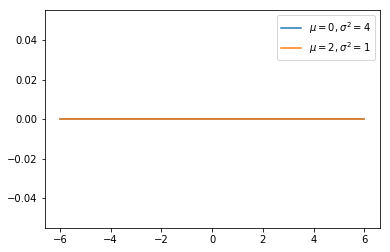

In [63]:
# don't change this
gaussian_params_1 = (0, 2**2)
gaussian_params_2 = (2, 1**2)

x = np.linspace(-6, 6, 100)
f1 = gaussian(x, *gaussian_params_1)
f2 = gaussian(x, *gaussian_params_2)
plt.plot(x, f1, label=r'$\mu={:d}, \sigma^2={:d}$'.format(*gaussian_params_1))
plt.plot(x, f2, label=r'$\mu={:d}, \sigma^2={:d}$'.format(*gaussian_params_2))

plt.legend();